In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## Exercise 1
a) Load house sales data from file kc_house_data.csv, print first records.  
b) Print the variable list. Select categorical and numerical variables.  
c) Compute basic statistics of numerical variables. Are all of them meaningful?

In [2]:
#a)
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
#b) 
house_categorical_df = [[
    "id",
    "date",
    "waterfront",
    "view",
    "condition",
    "grade",
    "zipcode",
]]

house_numerical_df = df[[
    "bathrooms",
    "bedrooms",
    "floors",
    "lat",
    "long",
    "price",
    "sqft_above",
    "sqft_basement",
    "sqft_living",
    "sqft_living15",
    "sqft_lot",
    "sqft_lot15",
    "yr_built",
    "yr_renovated",
]]


In [4]:
#c)
house_numerical_df.describe()

,bathrooms,bedrooms,floors,lat,long,price,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot,sqft_lot15,yr_built,yr_renovated
count,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000
mean,2.114757,3.370842,1.494309,47.560053,-122.213896,5.400881e+05,1788.390691,291.509045,2079.899736,1986.552492,1.510697e+04,12768.455652,1971.005136,84.402258
std,0.770163,0.930062,0.539989,0.138564,0.140828,3.671272e+05,828.090978,442.575043,918.440897,685.391304,4.142051e+04,27304.179631,29.373411,401.679240
min,0.000000,0.000000,1.000000,47.155900,-122.519000,7.500000e+04,290.000000,0.000000,290.000000,399.000000,5.200000e+02,651.000000,1900.000000,0.000000
25%,1.750000,3.000000,1.000000,47.471000,-122.328000,3.219500e+05,1190.000000,0.000000,1427.000000,1490.000000,5.040000e+03,5100.000000,1951.000000,0.000000
50%,2.250000,3.000000,1.500000,47.571800,-122.230000,4.500000e+05,1560.000000,0.000000,1910.000000,1840.000000,7.618000e+03,7620.000000,1975.000000,0.000000
75%,2.500000,4.000000,2.000000,47.678000,-122.125000,6.450000e+05,2210.000000,560.000000,2550.000000,2360.000000,1.068800e+04,10083.000000,1997.000000,0.000000
max,8.000000,33.000000,3.500000,47.777600,-121.315000,7.700000e+06,9410.000000,4820.000000,13540.000000,6210.000000,1.651359e+06,871200.000000,2015.000000,2015.000000


## Exercise 2
Using scatter plot:  
a) Show the relation of square footage and price.  
b) Check how price is influenced by apartment's grade. Find other variables correlated with price.  
c) Check how good apartments are distributed over the city. First, plot zipcode versus price. Then, use apartments coordinates (longitude and lattitude) in order to show where apartments of good grade are located. 

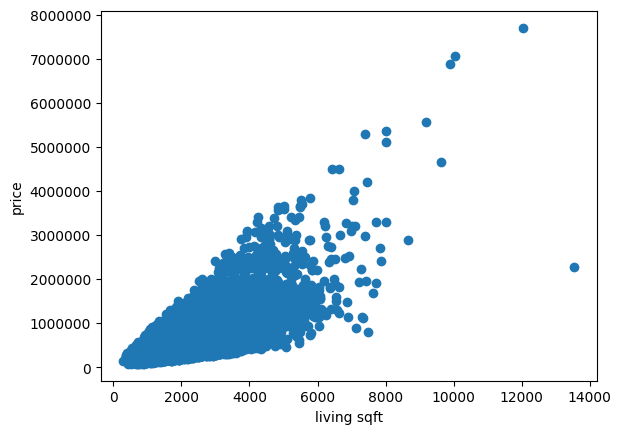

In [5]:
#a)
plt.scatter(df.sqft_living, df.price)
plt.ticklabel_format(style='plain')
plt.xlabel("living sqft")
plt.ylabel("price")
plt.show()

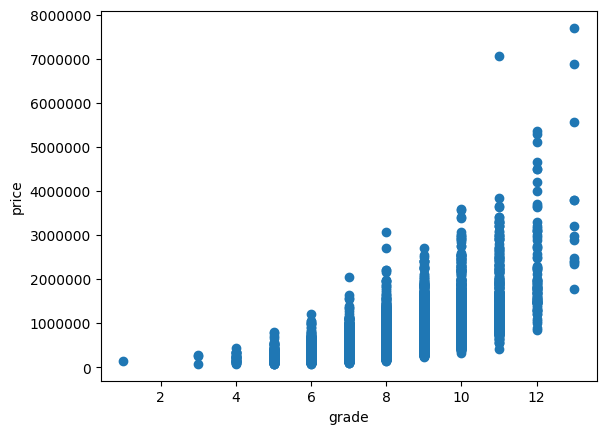

In [6]:
#b)
plt.scatter(df.grade, df.price)
plt.ticklabel_format(style='plain')
plt.xlabel("grade")
plt.ylabel("price")
plt.show()

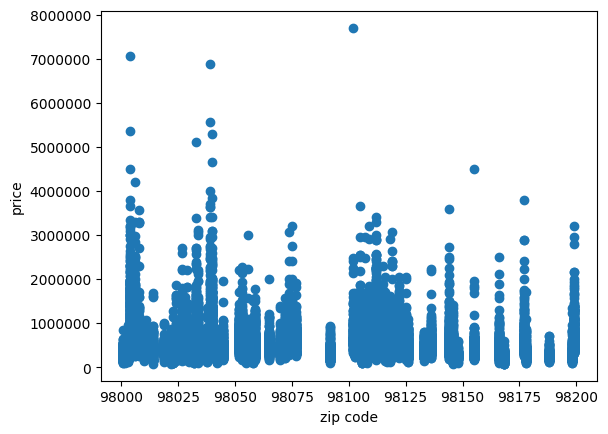

In [7]:
#c)
plt.scatter(df.zipcode, df.price)
plt.ticklabel_format(style='plain')
plt.xlabel("zip code")
plt.ylabel("price")
plt.show()

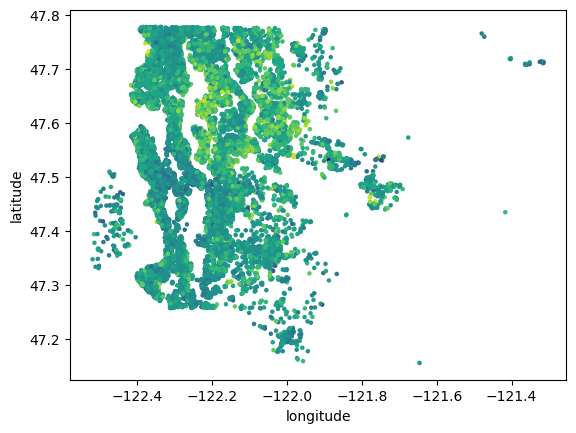

In [8]:
#Your code:
plt.scatter(df.long, df.lat, c=df.grade, s=5)
plt.ticklabel_format(style='plain')
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show()

## Exercise 3
a) Create boxplot of apartment's grade versus it's price. Compare with plot 2b).  
b) Create mosaic plot of any two categorical variables.

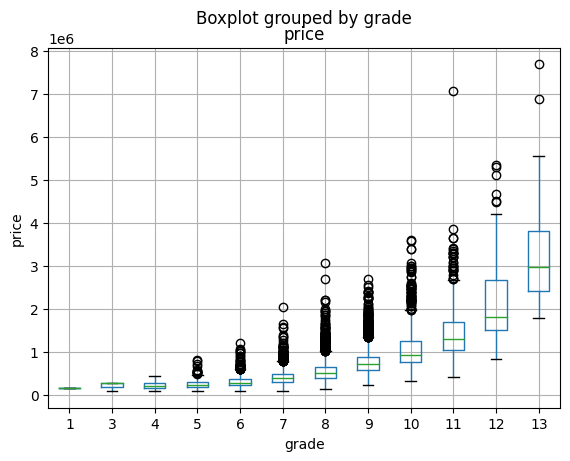

In [9]:
#a)
df.boxplot(column="price", by="grade")
plt.xlabel("grade")
plt.ylabel("price")
plt.show()

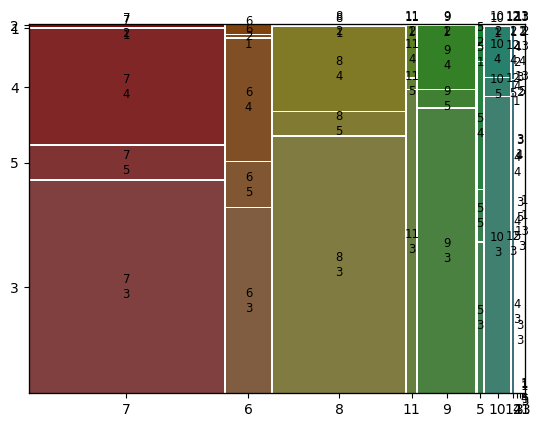

In [10]:
#b)
from statsmodels.graphics.mosaicplot import mosaic

mosaic(df, ["grade", "condition"])
plt.show()

## Exercise 4
"I am interested in the house with 3 bedrooms, 2 bathrooms and 2 floors"  
a) Compute the basic statistics of apartments fulfilling above constraints.  
b) Distinct accepted apartments on any of previously created plots.  
c) Find such apartments with best price to footage ratio.  

In [11]:
#a)
cond = (df.bedrooms == 3) & (df.bathrooms == 2) & (df.floors == 2)

df.loc[cond].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.540000e+02,1.540000e+02,154.0,154.0,154.000000,154.000000,154.0,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,4.397177e+09,5.144986e+05,3.0,2.0,1850.279221,23678.948052,2.0,0.006494,0.357143,3.435065,7.551948,1717.422078,132.857143,1969.779221,284.863636,98085.577922,47.567376,-122.247091,1802.337662,17545.123377
std,2.849813e+09,2.497661e+05,0.0,0.0,547.585413,83324.024708,0.0,0.080582,0.919495,0.713322,0.832684,527.473851,248.092631,34.654456,700.057328,48.808788,0.143221,0.150507,453.210930,40404.134611
min,7.600057e+06,2.090000e+05,3.0,2.0,1020.000000,700.000000,2.0,0.000000,0.000000,2.000000,6.000000,720.000000,0.000000,1900.000000,0.000000,98001.000000,47.194700,-122.519000,850.000000,886.000000
25%,2.060901e+09,3.769750e+05,3.0,2.0,1452.500000,3414.750000,2.0,0.000000,0.000000,3.000000,7.000000,1402.500000,0.000000,1942.250000,0.000000,98038.500000,47.498800,-122.361750,1452.500000,4020.000000
50%,3.630010e+09,4.640000e+05,3.0,2.0,1700.000000,5868.500000,2.0,0.000000,0.000000,3.000000,7.000000,1625.000000,0.000000,1984.500000,0.000000,98103.000000,47.584750,-122.299500,1725.000000,6278.000000
75%,7.184074e+09,5.894625e+05,3.0,2.0,2127.500000,10800.250000,2.0,0.000000,0.000000,4.000000,8.000000,1977.500000,207.500000,1997.500000,0.000000,98122.000000,47.682400,-122.149250,2117.500000,10392.250000
max,9.829200e+09,1.755000e+06,3.0,2.0,3650.000000,843309.000000,2.0,1.000000,4.000000,5.000000,10.000000,3650.000000,1120.000000,2014.000000,2014.000000,98199.000000,47.777000,-121.709000,3170.000000,273992.000000


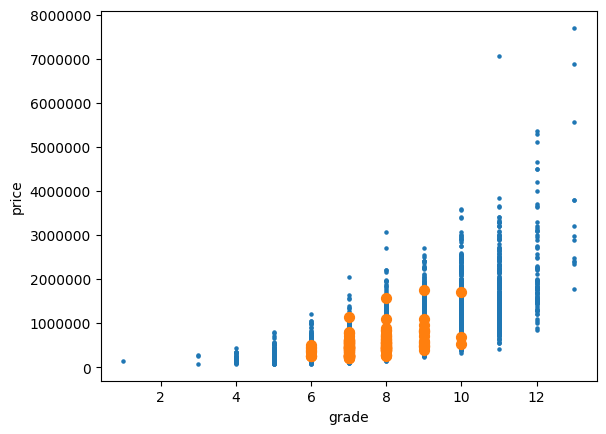

In [12]:
#b)
groups = df.groupby(cond)
target = groups.get_group(True)
other = groups.get_group(False)
plt.scatter(other["grade"], other["price"], s=5)
plt.scatter(target["grade"], target["price"], s=50)
plt.ticklabel_format(style='plain')
plt.xlabel("grade")
plt.ylabel("price")
plt.show()

In [13]:
# c)
dfc = df.loc[cond]
dfc.loc[(dfc.price / dfc.sqft_living).sort_values().index].head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9704,7452500565,20140829T000000,260000.0,3,2.0,2710,5000,2.0,0,0,...,6,2710,0,1951,0,98126,47.5188,-122.373,850,5000
11258,7937600262,20140710T000000,379900.0,3,2.0,3110,44967,2.0,0,0,...,9,3020,90,1999,0,98058,47.4343,-122.082,2150,44967
19880,3832050860,20150319T000000,210000.0,3,2.0,1580,4961,2.0,0,0,...,7,1580,0,2006,0,98042,47.3338,-122.053,2280,5000
16014,5104450440,20141113T000000,252500.0,3,2.0,1810,10684,2.0,0,0,...,8,1810,0,1987,0,98058,47.4619,-122.153,2140,9657
20906,3355400242,20141028T000000,274900.0,3,2.0,1936,6612,2.0,0,0,...,7,1936,0,2014,0,98001,47.2602,-122.246,1620,21600
